In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20, 20)

import cv2
from scipy.signal import convolve2d
from mycv import conv2D, imread, imshow, gaussian_kernel, normalize_minmax

from utils import *
    
resdir = 'res'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Text segmentation

In [4]:
TASK = 1
if not os.path.exists('{}/{}'.format(resdir, task_dirtree[TASK][0])):
    os.makedirs('{}/{}'.format(resdir, task_dirtree[TASK][0]))

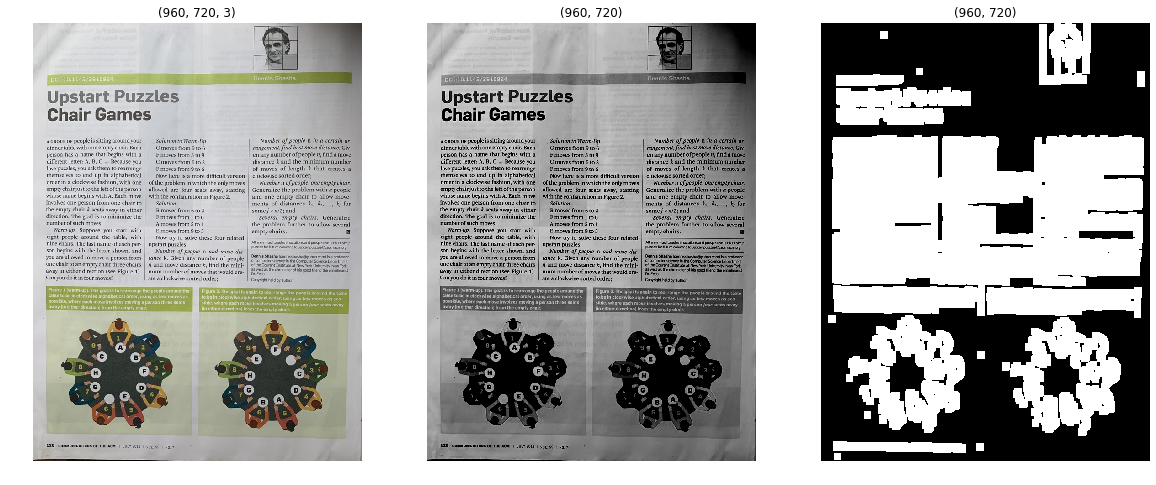

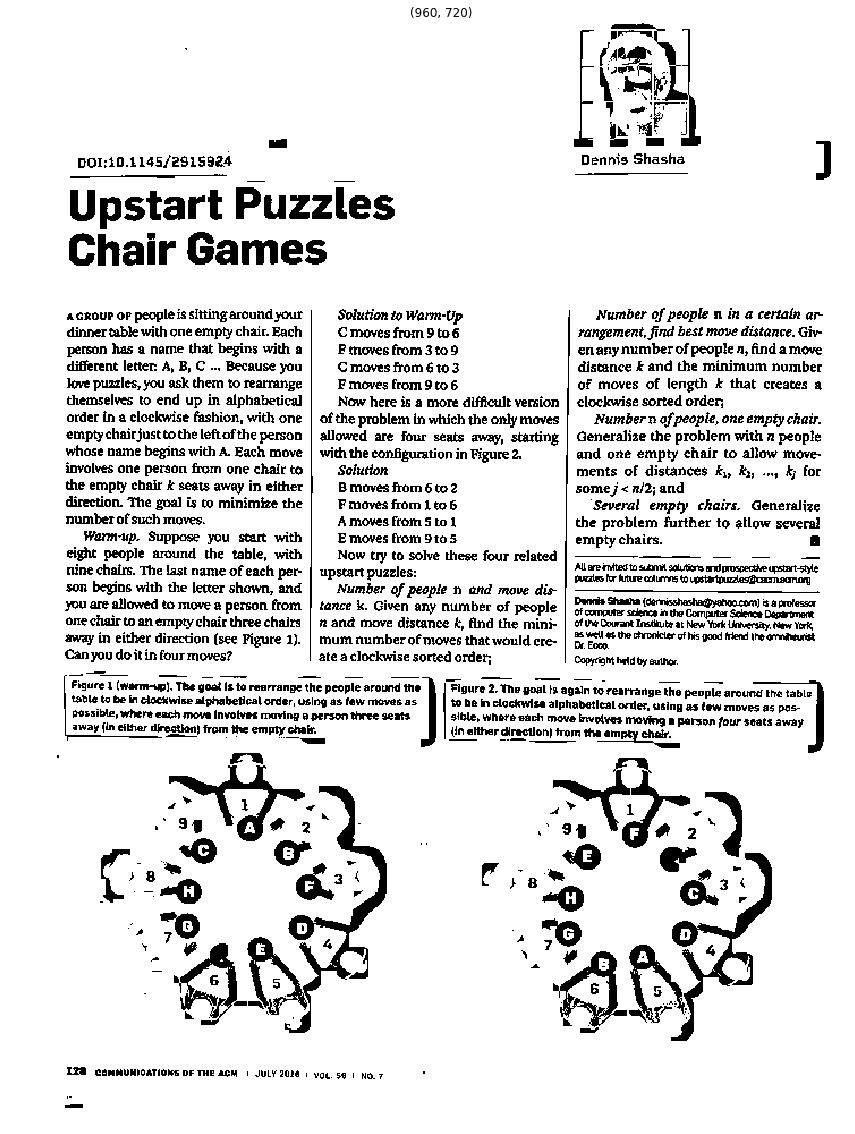

In [330]:
example_id = 1

image, image_gray = get_example(example_id, TASK, brightness_value=-100, clahe=False, clahe2=False,
                                channel=0, show=True)
contours, text_mask = detect_text(image, image_gray, kernel=7, dilate_kernel=6)
imshow(text_mask, sub=(1,3,3))
plt.show()

threshold = cv2.adaptiveThreshold(image_gray, 255,
                                  cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                  cv2.THRESH_BINARY, 255, 10)

blurred = cv2.GaussianBlur(threshold, (39,39), 7)
blobs = cv2.threshold(blurred, 85, 255, cv2.THRESH_BINARY)[1]
invert_mask = cv2.dilate(255-blobs, np.ones((5,5)), iterations=5).astype(bool)

text_p1 = ((1 - invert_mask) * (255 - threshold)).astype(bool)
text_p2 = (invert_mask * threshold).astype(bool)


text_result = 1 - (text_p1 + text_p2) * text_mask.astype(bool)
imshow(text_result)
save(text_result, TASK, example_id)

---

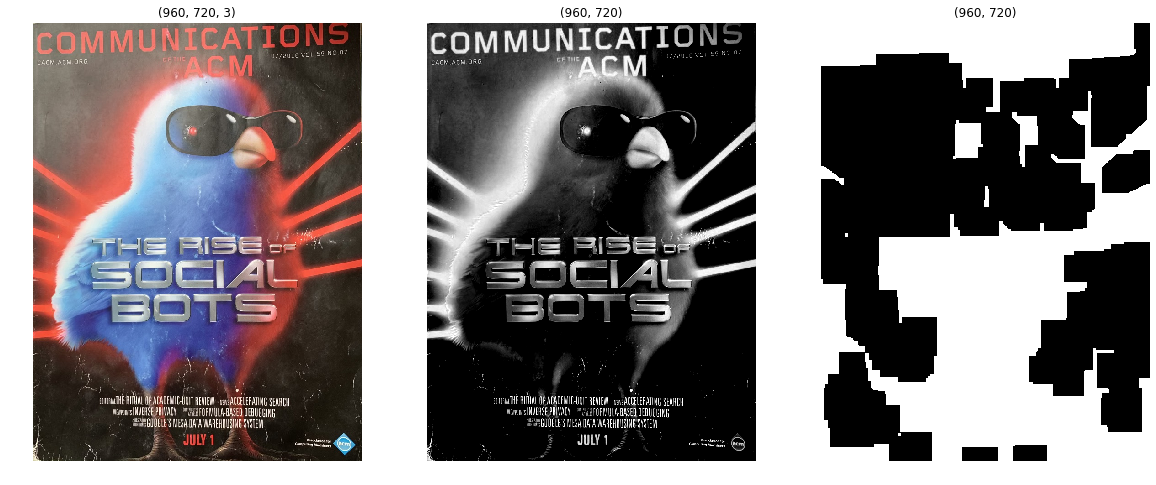

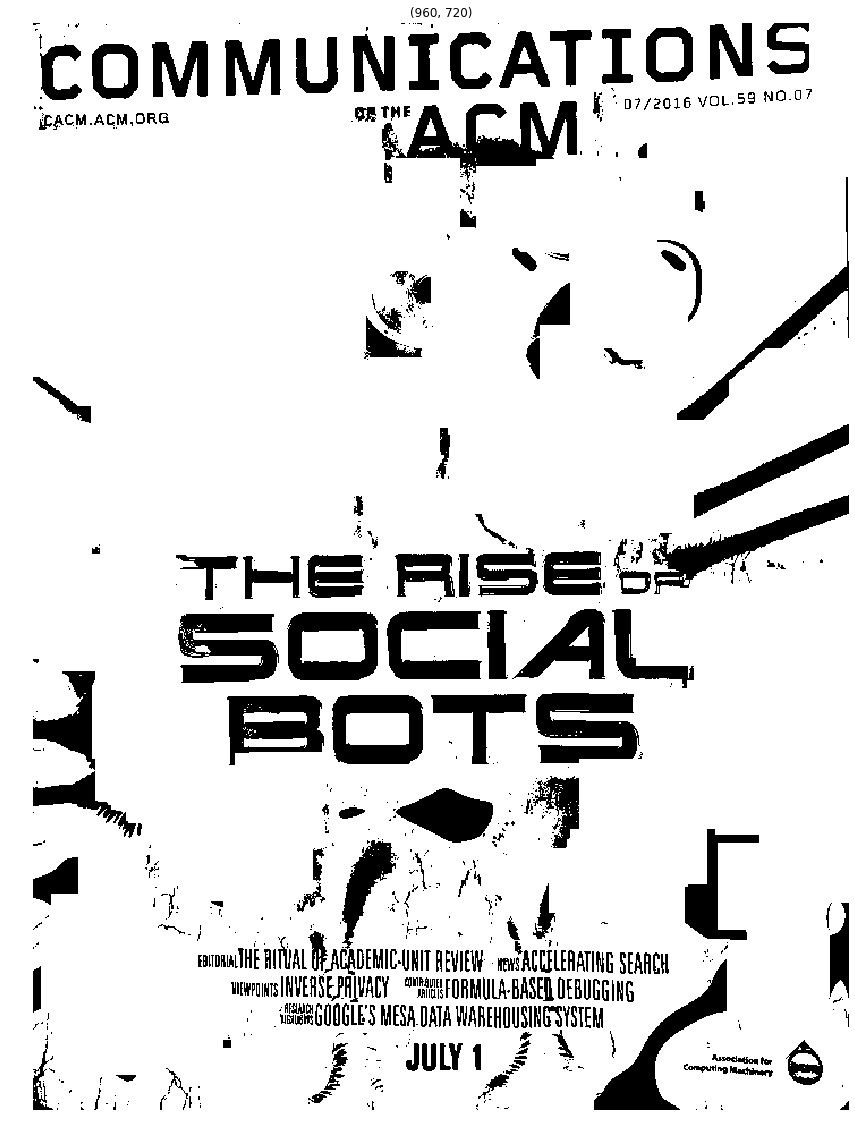

In [382]:
example_id = 2
image, image_gray = get_example(example_id, TASK, brightness_value=-100, channel=0, show=True)
contours, text_mask = detect_text(image, kernel=63, dilate_kernel=3)
imshow(text_mask, sub=(1,3,3))
plt.show()

kernel = np.array([[0,-1,-0],[-1,6,-1],[0,-1,0]])
enhanced = conv2D(image_gray, kernel)
# imshow(enhanced)
# text = (255 - (enhanced > 100) * 255)
threshold = cv2.adaptiveThreshold(image_gray, 255,
                                  cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                  cv2.THRESH_BINARY, 101, 1)
# imshow(threshold)
text = 255 - threshold
text = masked_result(text, text_mask)
# imshow(text)
imshow(text)
save(text, TASK, example_id)

---

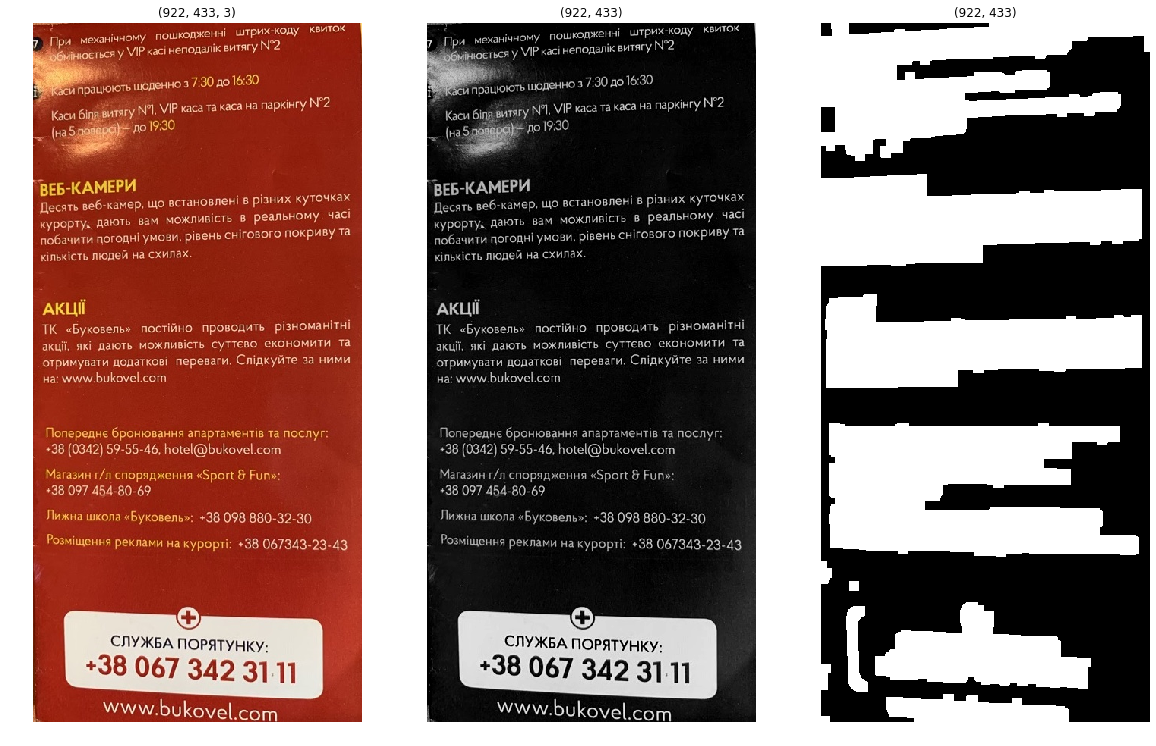

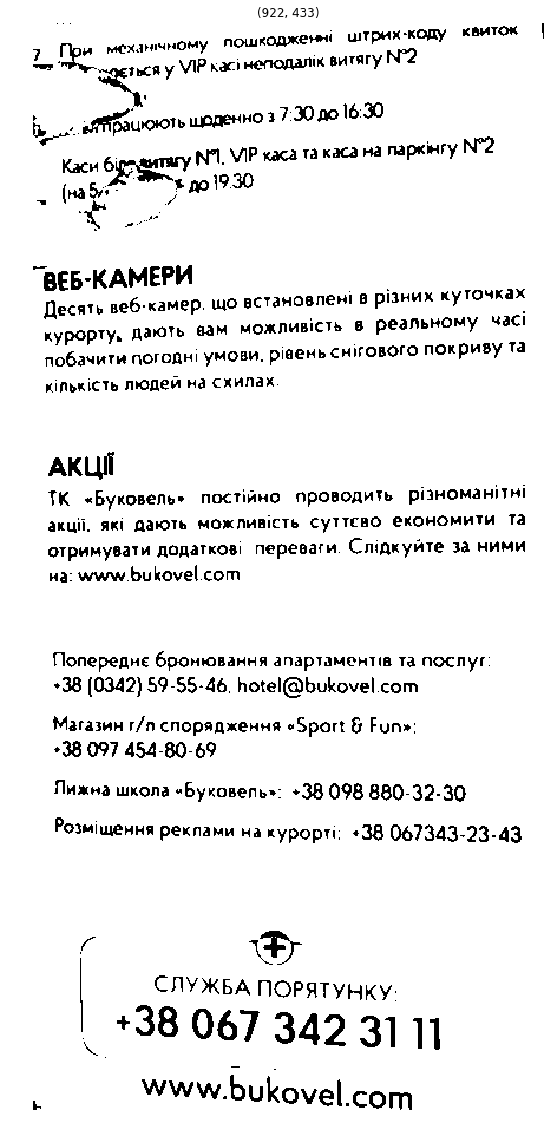

In [373]:
example_id = 3
image, image_gray = get_example(example_id, task=TASK, brightness_value=-60, clahe=False, show=True)
contours, text_mask = detect_text(image, kernel=21, dilate_kernel=5)
imshow(text_mask, sub=(1,3,3))
plt.show()

blurred = cv2.GaussianBlur(image_gray, (3,3), 0)
_, threshold = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)# + cv2.THRESH_OTSU)
# imshow(1 - threshold.astype(bool) * text_mask)
blobs_soft = cv2.GaussianBlur(threshold, (39,39), 9)
# imshow(blobs_soft)
blobs = cv2.threshold(blobs_soft, 255, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1].astype(bool)
# imshow(blobs)

# blobs2 = (blobs.astype(bool) * blobs_soft) / 255
# imshow(blobs2)
threshold = threshold.astype(bool)
text_result = threshold * blobs + (1 - threshold) * (1 - blobs)
text_result = 1 - text_mask * (1 - text_result)
imshow(text_result)
save(text_result, TASK, example_id)

---

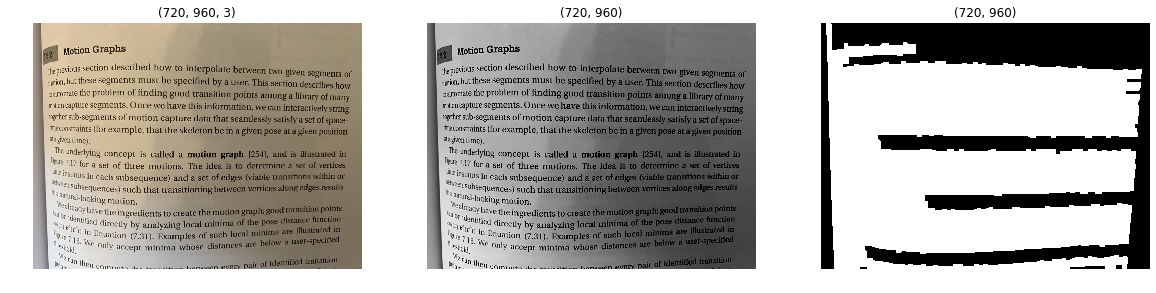

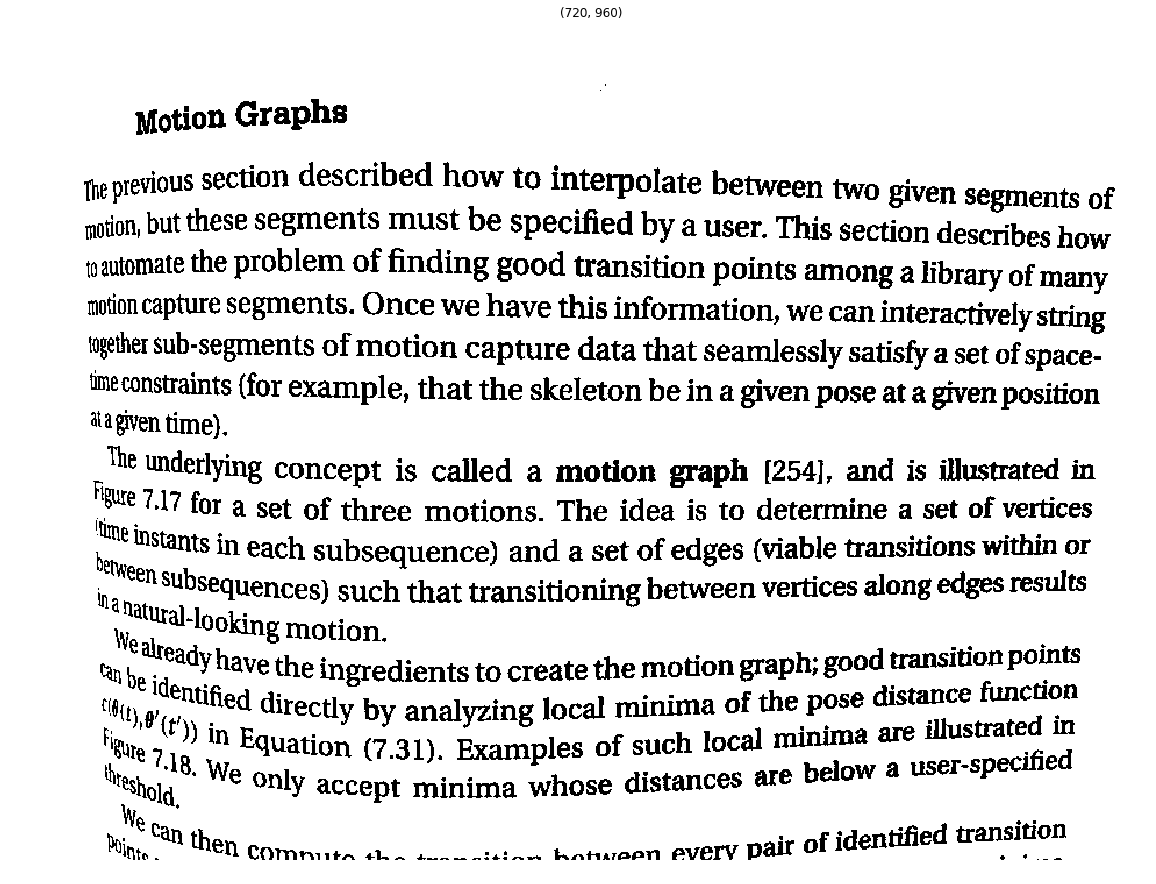

In [383]:
example_id = 4
image, image_gray = get_example(example_id, task=TASK, brightness_value=-60, clahe=False, show=True)
contours, text_mask = detect_text(image, kernel=21, dilate_kernel=5)
imshow(text_mask, sub=(1,3,3))
plt.show()

threshold = cv2.adaptiveThreshold(image_gray, 255,
                                  cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                  cv2.THRESH_BINARY, 255, 10)

blurred = cv2.GaussianBlur(threshold, (39,39), 0)
blobs = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]
blobs = 255 - blobs
blobs = cv2.dilate(blobs, np.ones((7,7)), iterations=3).astype(bool)
blobs = 1 - blobs
text_result = 1 - (1 - threshold.astype(bool)) * blobs
imshow(text_result)
save(text_result, TASK, example_id)

---

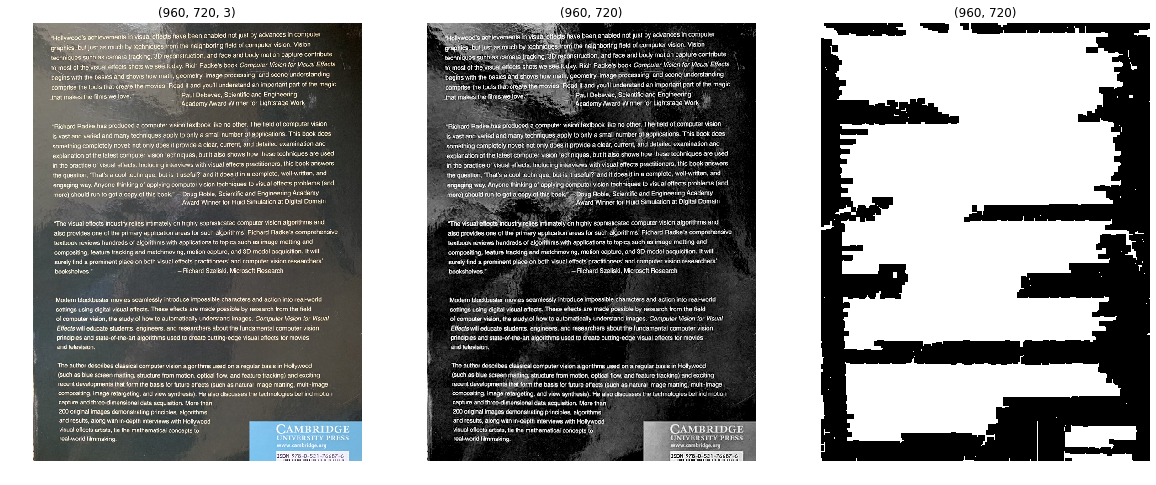

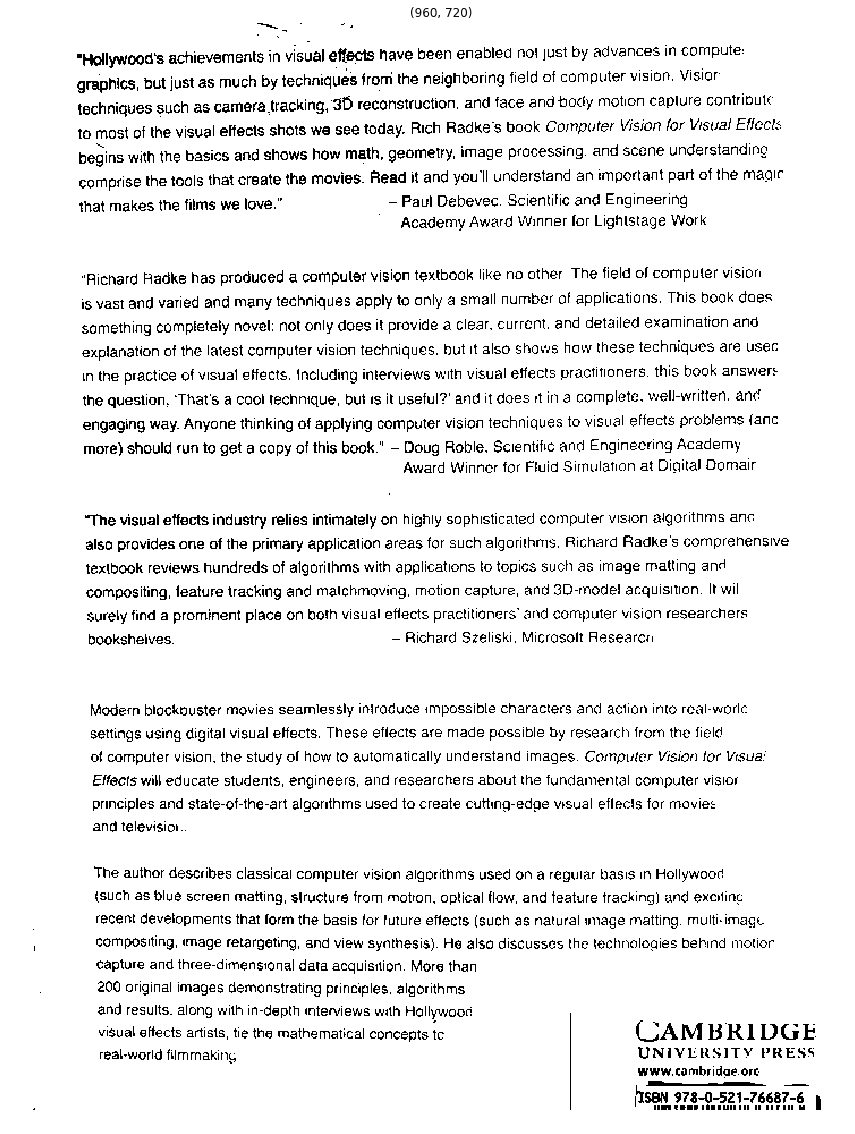

In [560]:
example_id = 5

image, image_gray = get_example(example_id, TASK, brightness_value=-60,
                                clahe=True, show=True)
contours, text_mask = detect_text(image, kernel=11)
imshow(text_mask, sub=(1,3,3))
plt.show()

threshold = cv2.threshold(image_gray, 135, 255, cv2.THRESH_BINARY)[1]
text_result = 1 - threshold.astype(bool)
text_result = 1 - text_mask * (1 - text_result)

blurred = cv2.GaussianBlur(threshold, (29,29), 17)
blobs = cv2.threshold(blurred, 120, 255, cv2.THRESH_BINARY)[1]
blobs = cv2.dilate(blobs, np.ones((3,3)), iterations=3)
lower_text = 1 - blobs * image_gray
lower_text = cv2.threshold(lower_text, 150, 255, cv2.THRESH_BINARY)[1]
upper_text = text_result * (1 - blobs.astype(bool))
text_result = lower_text.astype(bool) + upper_text.astype(bool)

imshow(text_result)
save(text_result, TASK, example_id)

---

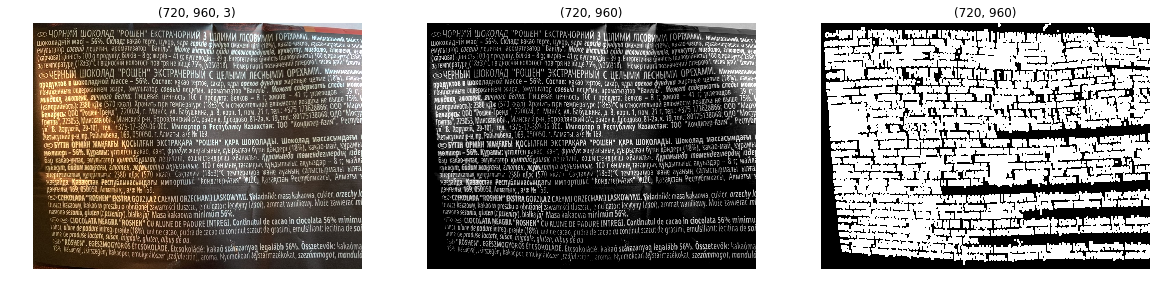

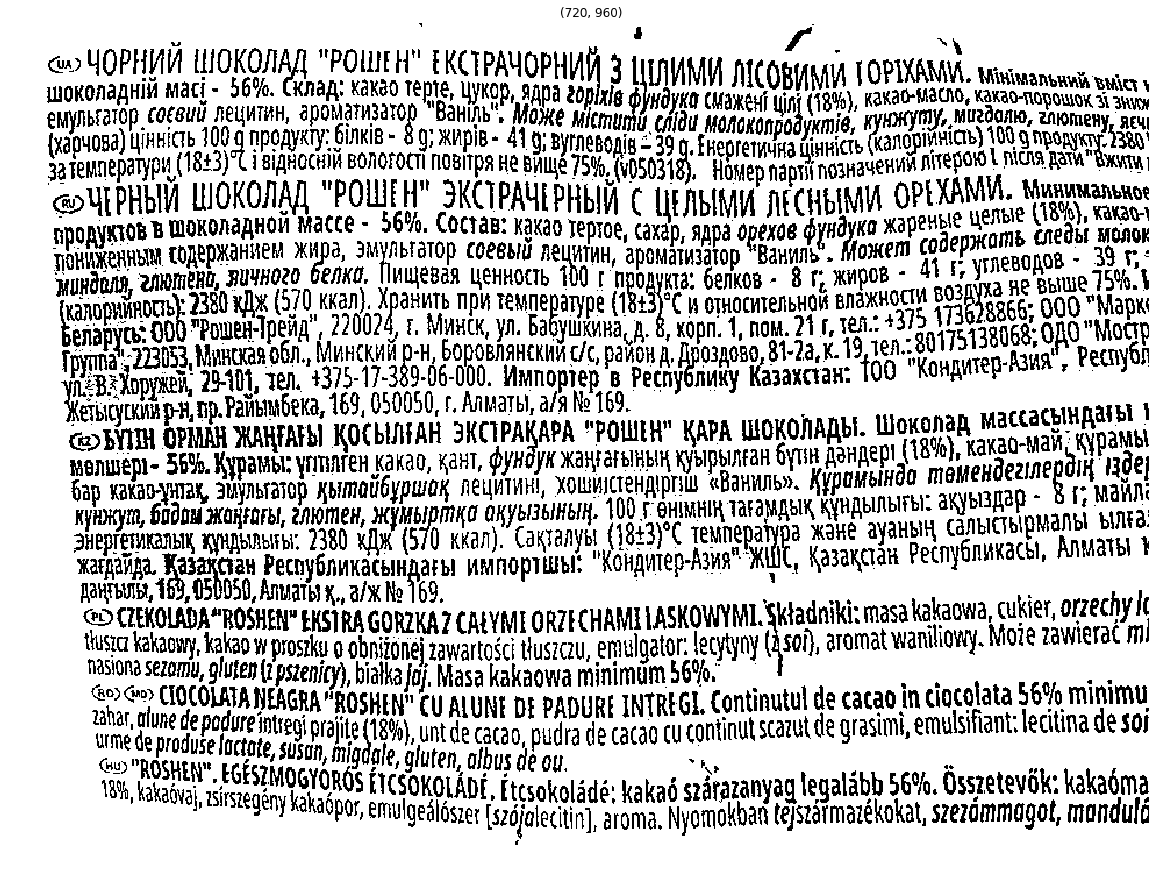

In [651]:
example_id = 6
image, image_gray = get_example(example_id, TASK, brightness_value=-60, clahe=False)
contours, text_mask = detect_text(image, kernel=4, dilate_kernel=3, dilate_iter=2)
imshow(text_mask, sub=(1,3,3))
plt.show()

threshold = cv2.adaptiveThreshold(image_gray, 255,
                                  cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                  cv2.THRESH_BINARY, 15, 0)
text_result = 1 - threshold.astype(bool)
text_result = 1 - text_mask * (1 - text_result)
imshow(text_result)
save(text_result, TASK, example_id)

# Count of objects

In [658]:
TASK = 2
if not os.path.exists('{}/{}'.format(resdir, task_dirtree[TASK][0])):
    os.makedirs('{}/{}'.format(resdir, task_dirtree[TASK][0]))

In [660]:
for example_id in range(1,13):
    image_gray = get_example(example_id, TASK, brightness_value=0, clahe=False, show=True)
    plt.show()

# Foreground-Background Segmentation

In [661]:
TASK = 3
if not os.path.exists('{}/{}'.format(resdir, task_dirtree[TASK][0])):
    os.makedirs('{}/{}'.format(resdir, task_dirtree[TASK][0]))

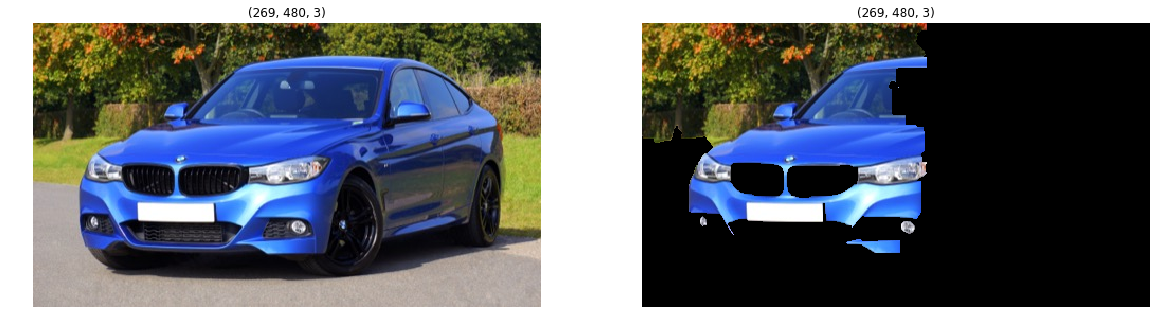

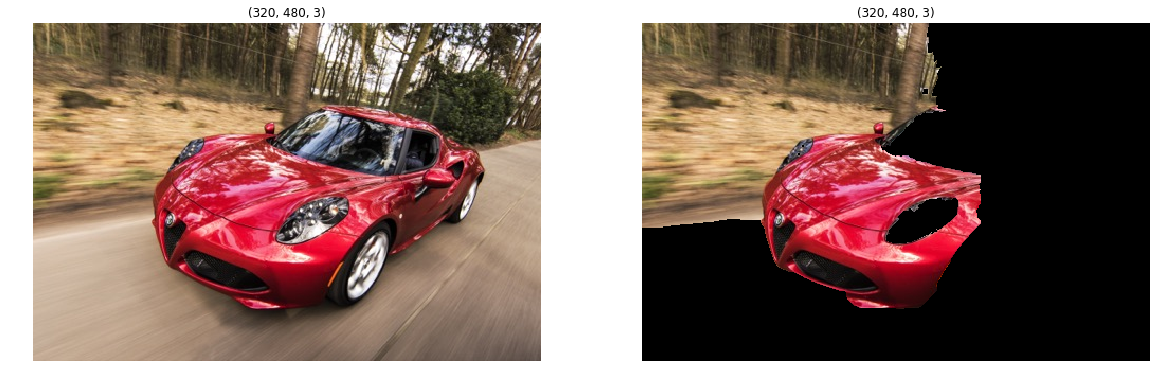

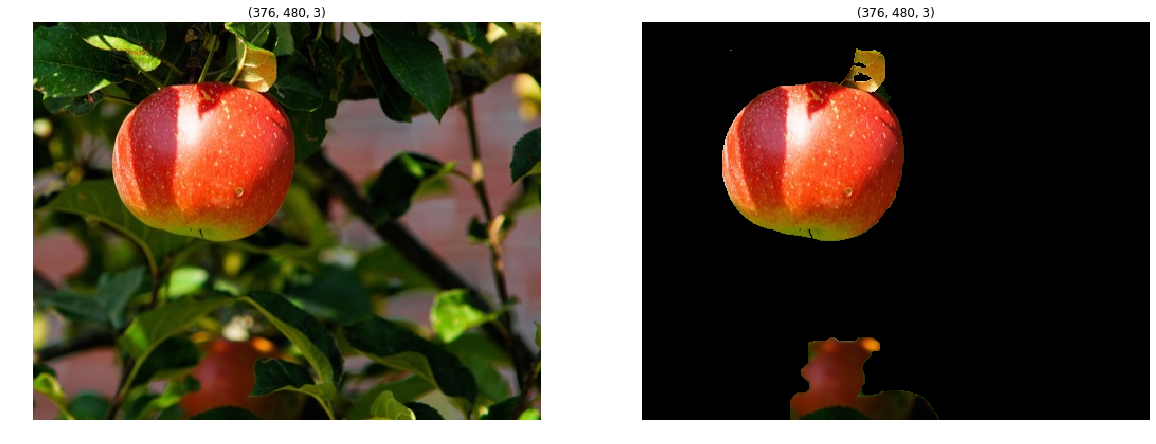

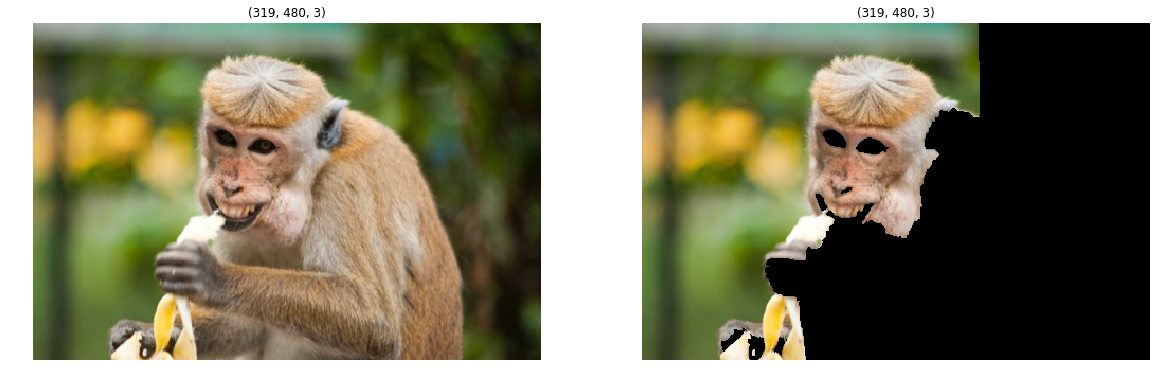

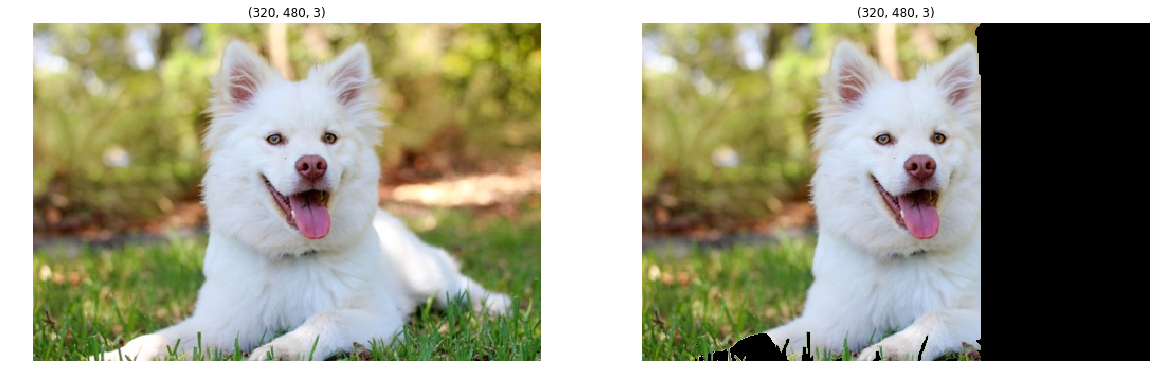

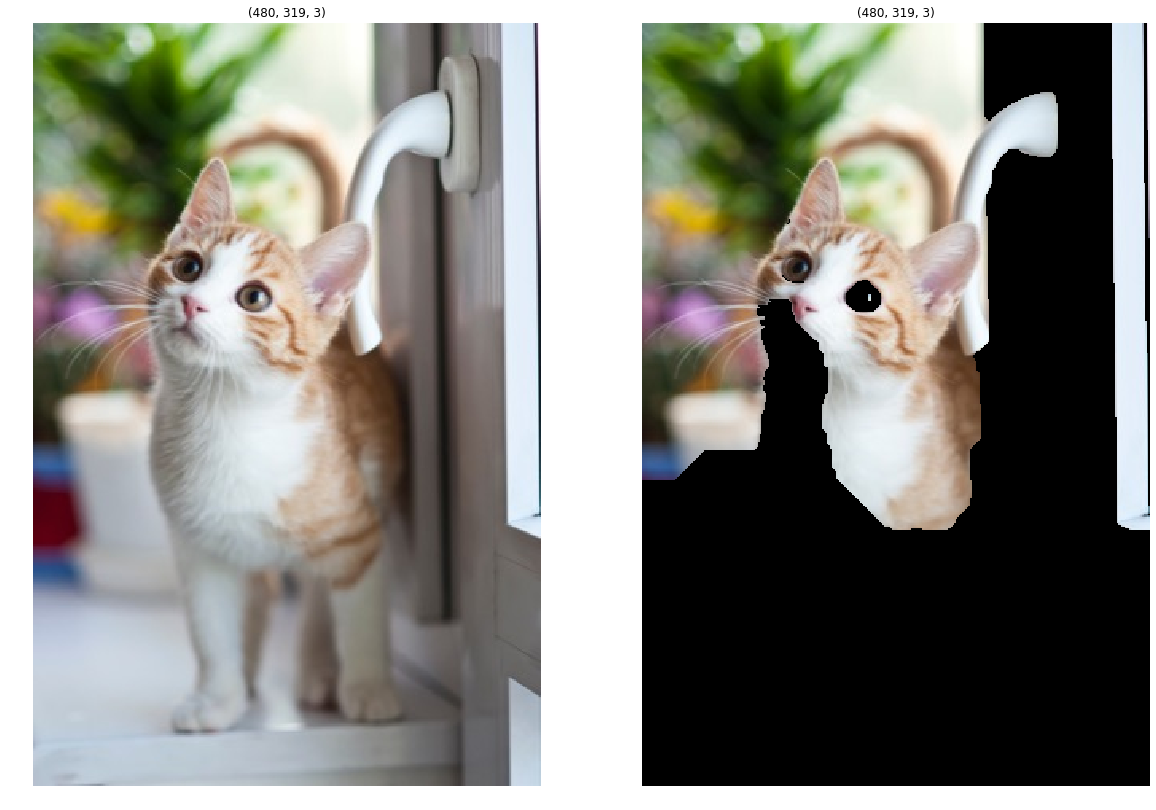

In [664]:
for example_id in range(1,7):
    image, image_gray = get_example(example_id, TASK, brightness_value=0, clahe=False, show=False)
    imshow(image, sub=(1,2,1))
    
    mask = np.zeros(image.shape[:2], np.uint8)
    
    bgdModel = np.zeros((1,65), np.float64)
    fgdModel = np.zeros((1,65), np.float64)
   
    rect = (0, 0, *image_gray.shape)
    cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
   
    mask2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')
    image = image * mask2[:,:,np.newaxis]

    imshow(image, sub=(1,2,2))
    plt.show()